# Data Exploration

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Report Number                   51490 non-null  object 
 1   Local Case Number               45037 non-null  object 
 2   Agency Name                     51490 non-null  object 
 3   ACRS Report Type                51490 non-null  object 
 4   Crash Date/Time                 51490 non-null  object 
 5   Route Type                      46522 non-null  object 
 6   Road Name                       46988 non-null  object 
 7   Cross-Street Type               46471 non-null  object 
 8   Cross-Street Name               46968 non-null  object 
 9   Off-Road Description            6950 non-null   object 
 10  Municipality                    7567 non-null   object 
 11  Related Non-Motorist            3648 non-null   object 
 12  Collision Type                  

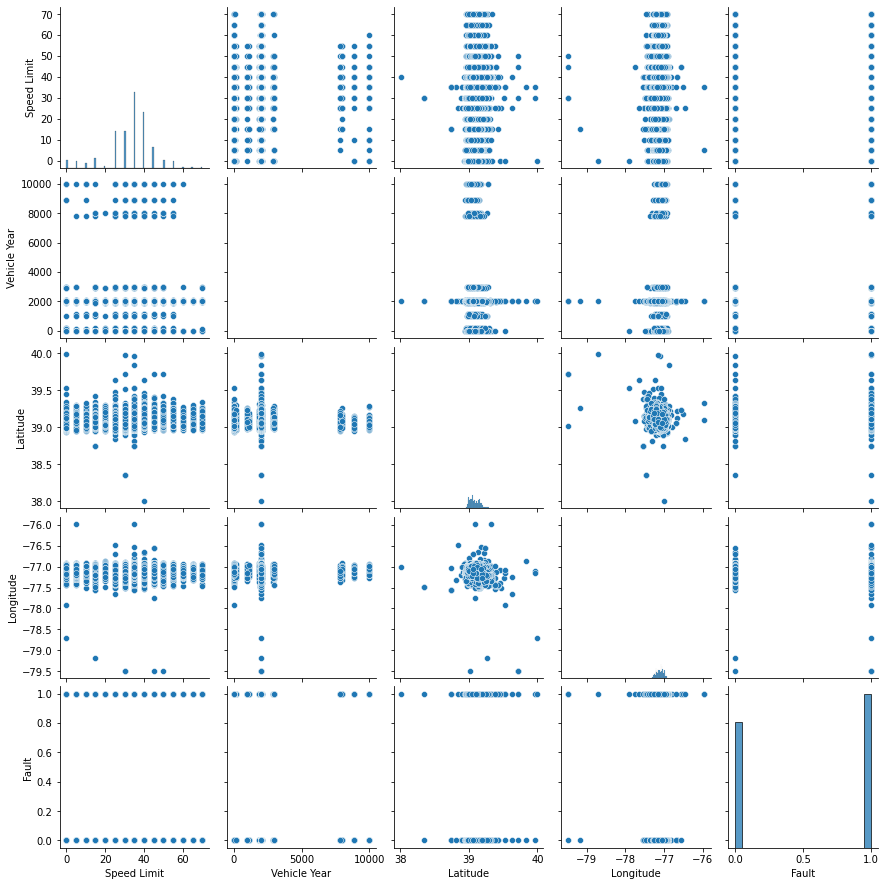

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print(df_train.info())
print(df_train.describe())
sns.pairplot(df_train)

# Data Cleaning and Preprocessing

Dates weren't recorded in a format understood by matplotlib so change it to pandas.to_datetime function.

In [110]:
df_train["Crash Date/Time"] = pd.to_datetime(df_train["Crash Date/Time"])
df_train.set_index('Crash Date/Time', inplace=True)
df_train.sort_index(inplace=True)

df_test["Crash Date/Time"] = pd.to_datetime(df_test["Crash Date/Time"])
df_test.set_index('Crash Date/Time', inplace=True)
df_test.sort_index(inplace=True)

Many of the columns have null values. We will look at the fraction of NA values in the columns in descending order.

In [111]:
df_train.isna().sum().sort_values(ascending=False)/len(df_train)

Non-Motorist Substance Abuse      0.934279
Related Non-Motorist              0.929151
Off-Road Description              0.865022
Municipality                      0.853039
Circumstance                      0.771762
Equipment Problems                0.207147
Driver Substance Abuse            0.176636
Traffic Control                   0.150981
Local Case Number                 0.125325
Surface Condition                 0.114178
Cross-Street Type                 0.097475
Route Type                        0.096485
Cross-Street Name                 0.087823
Road Name                         0.087434
Weather                           0.078248
Drivers License State             0.049097
Vehicle Continuing Dir            0.021927
Vehicle Going Dir                 0.021616
Vehicle Body Type                 0.015246
Light                             0.013673
Vehicle Damage Extent             0.007710
Collision Type                    0.005807
Vehicle Second Impact Location    0.004545
Vehicle Fir

We are going to drop the columns which have more than 75% NA values in them

In [112]:
df_train.drop(columns=['Off-Road Description', 'Municipality', 
                       'Related Non-Motorist', 'Circumstance', 
                       'Non-Motorist Substance Abuse'], axis=1, inplace=True)

In [113]:
df_test.drop(columns=['Off-Road Description', 'Municipality', 
                      'Related Non-Motorist', 'Circumstance', 
                      'Non-Motorist Substance Abuse'], axis=1, inplace=True)

Next we will replace some values with nan values which are common throughout the dataset and may indicate missing data. 

In [114]:
df_train.replace(['UNKNOWN','Unknown','OTHER'], np.nan, inplace=True)

In [115]:
df_test.replace(['UNKNOWN','Unknown','OTHER'], np.nan, inplace=True)

Let check empty strings

In [116]:
df_train.select_dtypes(include='object').apply(lambda x: x.eq('')).sum()

Report Number                     0
Local Case Number                 0
Agency Name                       0
ACRS Report Type                  0
Route Type                        0
Road Name                         0
Cross-Street Type                 0
Cross-Street Name                 0
Collision Type                    0
Weather                           0
Surface Condition                 0
Light                             0
Traffic Control                   0
Driver Substance Abuse            0
Person ID                         0
Injury Severity                   0
Drivers License State             0
Vehicle ID                        0
Vehicle Damage Extent             0
Vehicle First Impact Location     0
Vehicle Second Impact Location    0
Vehicle Body Type                 0
Vehicle Movement                  0
Vehicle Continuing Dir            0
Vehicle Going Dir                 0
Driverless Vehicle                0
Parked Vehicle                    0
Vehicle Make                

No empty strings found in the data

We can see speed Limit column has values like 0 which may indicate bad data or no speed limit. Speed with 5 units may indicate collisions in a place like parking lot.

[Text(0.5, 1.0, 'Accidents by Speed Limit')]

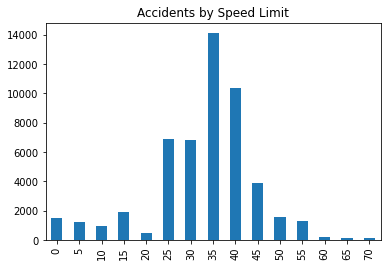

In [117]:
df_train['Speed Limit'].value_counts().sort_index().plot.bar().set(title='Accidents by Speed Limit')

* Find max and min longitude and latitude from test data so that we can trim train data accordingly

In [118]:
print('Test Data')
max_lon = max(df_test['Longitude'])
min_lon = min(df_test['Longitude'])
max_lat = max(df_test['Latitude'])
min_lat = min(df_test['Latitude'])
print('Longitude: ',min_lon, ', ', max_lon)
print('Latitude: ',min_lat, ', ', max_lat)

Test Data
Longitude:  -79.486 ,  -75.52770787
Latitude:  37.72 ,  39.990414


In [119]:
print('Train Data')
max_lon = max(df_train['Longitude'])
min_lon = min(df_train['Longitude'])
max_lat = max(df_train['Latitude'])
min_lat = min(df_train['Latitude'])
print('Longitude: ',min_lon, ', ', max_lon)
print('Latitude: ',min_lat, ', ', max_lat)

Train Data
Longitude:  -79.486 ,  -75.97595215
Latitude:  38.00812 ,  39.98974718


Both Train and Test Data is almost from same area/distribution

In [120]:
df_train.isna().sum().sort_values(ascending=False)/len(df_train)

Equipment Problems                0.292542
Driver Substance Abuse            0.246650
Cross-Street Type                 0.174345
Traffic Control                   0.171664
Surface Condition                 0.125520
Local Case Number                 0.125325
Collision Type                    0.117926
Route Type                        0.100563
Weather                           0.090911
Cross-Street Name                 0.087823
Road Name                         0.087434
Vehicle Continuing Dir            0.060303
Vehicle Going Dir                 0.056535
Vehicle Damage Extent             0.053875
Drivers License State             0.049097
Vehicle Body Type                 0.033754
Light                             0.030278
Driverless Vehicle                0.027015
Vehicle Movement                  0.025830
Vehicle Second Impact Location    0.021985
Vehicle First Impact Location     0.021635
Vehicle Model                     0.019849
Vehicle Make                      0.019013
ACRS Report

* Replace NA values of corresponding columns with their MODE

In [121]:
for column in df_train.columns:
  df_train[column].fillna(df_train[column].mode()[0], inplace=True)

In [122]:
df_train.isna().sum().sort_values(ascending=False)/len(df_train)

Fault                             0.0
Location                          0.0
Injury Severity                   0.0
Person ID                         0.0
Driver Substance Abuse            0.0
Traffic Control                   0.0
Light                             0.0
Surface Condition                 0.0
Weather                           0.0
Collision Type                    0.0
Cross-Street Name                 0.0
Cross-Street Type                 0.0
Road Name                         0.0
Route Type                        0.0
ACRS Report Type                  0.0
Agency Name                       0.0
Local Case Number                 0.0
Drivers License State             0.0
Vehicle ID                        0.0
Vehicle Damage Extent             0.0
Parked Vehicle                    0.0
Longitude                         0.0
Latitude                          0.0
Equipment Problems                0.0
Vehicle Model                     0.0
Vehicle Make                      0.0
Vehicle Year

In [123]:
df_train['Vehicle Movement'].nunique()

20

In [124]:
df_train.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Route Type', 'Road Name', 'Cross-Street Type', 'Cross-Street Name',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse', 'Person ID',
       'Injury Severity', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location', 'Fault'],
      dtype='object')

As we can see all NA values are replaced

Now let's drop all the columns which are having -  
* Either only one unique value
* Mostly all unique values


In [125]:
df_train.drop([
         'Driverless Vehicle', 'Report Number', 'Local Case Number', 'Agency Name',
         'Cross-Street Name', 'Person ID', 'Vehicle ID', 'Vehicle Continuing Dir', 
         'Vehicle Going Dir', 'Location', 'Road Name', 'Drivers License State',
         'Vehicle Make', 'Vehicle Model'], axis=1, inplace=True)

In [ ]:
df_test.drop([
         'Driverless Vehicle', 'Report Number', 'Local Case Number', 'Agency Name',
         'Cross-Street Name', 'Person ID', 'Vehicle ID', 'Vehicle Continuing Dir', 
         'Vehicle Going Dir', 'Location', 'Road Name', 'Drivers License State',
         'Vehicle Make', 'Vehicle Model'], axis=1, inplace=True)

In [129]:
test_id = df_test['Id']

In [130]:
df_test.drop(['Id'], axis=1, inplace=True)

In [131]:
df_test.columns

Index(['ACRS Report Type', 'Route Type', 'Cross-Street Type', 'Collision Type',
       'Weather', 'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Injury Severity', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Second Impact Location',
       'Vehicle Body Type', 'Vehicle Movement', 'Speed Limit',
       'Parked Vehicle', 'Vehicle Year', 'Equipment Problems', 'Latitude',
       'Longitude'],
      dtype='object')

In [132]:
df_train['ACRS Report Type'].unique()

array(['Property Damage Crash', 'Fatal Crash', 'Injury Crash'],
      dtype=object)

In [133]:
print(len(df_train.columns))
print(len(df_test.columns))

22
21


In [134]:
df_train['Equipment Problems'].unique()

array(['NO MISUSE', 'STRAP/TETHER LOOSE', 'FACING WRONG WAY',
       'BELTS/ANCHORS BROKE', 'AIR BAG FAILED', 'BELT(S) MISUSED'],
      dtype=object)

In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51490 entries, 2015-01-01 00:30:00 to 2021-10-28 07:19:00
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ACRS Report Type                51490 non-null  object 
 1   Route Type                      51490 non-null  object 
 2   Cross-Street Type               51490 non-null  object 
 3   Collision Type                  51490 non-null  object 
 4   Weather                         51490 non-null  object 
 5   Surface Condition               51490 non-null  object 
 6   Light                           51490 non-null  object 
 7   Traffic Control                 51490 non-null  object 
 8   Driver Substance Abuse          51490 non-null  object 
 9   Injury Severity                 51490 non-null  object 
 10  Vehicle Damage Extent           51490 non-null  object 
 11  Vehicle First Impact Location   51490 non-null  object 
 1

Use Target and One-hot Encoding for categorical columns

Check number of unique values column-wise

In [136]:
for column in df_train.select_dtypes(include='object').columns:
  print("%-30s - %3d\n" % (column, df_train[column].nunique()))

ACRS Report Type               -   3

Route Type                     -   9

Cross-Street Type              -   9

Collision Type                 -  16

Weather                        -  10

Surface Condition              -   9

Light                          -   6

Traffic Control                -   9

Driver Substance Abuse         -   9

Injury Severity                -   5

Vehicle Damage Extent          -   5

Vehicle First Impact Location  -  15

Vehicle Second Impact Location -  15

Vehicle Body Type              -  28

Vehicle Movement               -  20

Parked Vehicle                 -   2

Equipment Problems             -   6



In [137]:
print(df_train.shape)
print(df_test.shape)

(51490, 22)
(77235, 21)


# Prediction

In [138]:
!pip install category_encoders

In [139]:
import category_encoders
from category_encoders import TargetEncoder
t_encoder = TargetEncoder()

In [140]:
X_train, y_train = df_train.drop(['Fault'], axis=1), df_train.Fault

In [141]:
print(X_train.shape)
print(y_train.shape)
print(df_test.shape)
print(df_train.columns)

(51490, 21)
(51490,)
(77235, 21)
Index(['ACRS Report Type', 'Route Type', 'Cross-Street Type', 'Collision Type',
       'Weather', 'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Injury Severity', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Second Impact Location',
       'Vehicle Body Type', 'Vehicle Movement', 'Speed Limit',
       'Parked Vehicle', 'Vehicle Year', 'Equipment Problems', 'Latitude',
       'Longitude', 'Fault'],
      dtype='object')


In [142]:
y_train

Crash Date/Time
2015-01-01 00:30:00    0
2015-01-01 01:10:00    0
2015-01-01 01:14:00    1
2015-01-01 01:14:00    0
2015-01-01 01:26:00    1
                      ..
2021-10-27 18:50:00    0
2021-10-27 19:53:00    1
2021-10-27 20:34:00    1
2021-10-27 21:09:00    1
2021-10-28 07:19:00    0
Name: Fault, Length: 51490, dtype: int64

In [143]:
t_encoder.fit(X_train, y_train)

TargetEncoder(cols=['ACRS Report Type', 'Route Type', 'Cross-Street Type',
                    'Collision Type', 'Weather', 'Surface Condition', 'Light',
                    'Traffic Control', 'Driver Substance Abuse',
                    'Injury Severity', 'Vehicle Damage Extent',
                    'Vehicle First Impact Location',
                    'Vehicle Second Impact Location', 'Vehicle Body Type',
                    'Vehicle Movement', 'Parked Vehicle',
                    'Equipment Problems'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=1.0, verbose=0)

In [144]:
X_train = t_encoder.transform(X_train)
X_test = t_encoder.transform(df_test)

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [146]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [147]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, 
                                 learning_rate=0.3, 
                                 max_depth=1).fit(X_train, y_train)

In [148]:
preds = clf.predict(X_test)

In [149]:
len(preds)

77235

In [150]:
submission = pd.DataFrame()
submission['Id'] = test_id
submission['Fault'] = preds

In [151]:
submission.to_csv('GB_clf.csv', index=False)